<a href="https://colab.research.google.com/github/Snake-AID/SnakeAid.ComputerVision/blob/main/SnakeTraining_YOLOv10_Khiem_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Mount Google Drive & cài thư viện

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Set thư mục chứa data.yaml + 3 folder train/test/valid

In [4]:
DATASET_ROOT = "/content/drive/MyDrive/SnakeAid.v4-masking-5k-image-.yolov12"

In [5]:
!pip install -U ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.7 MB/s eta 0:00:00


### 2. Train YOLO12 bằng Ultralytics

In [6]:
from ultralytics import YOLO
import os

os.chdir("/content")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [7]:
folders = ["train", "valid", "test"]

for folder in folders:
    print(f"\n===== 📁 {folder.upper()} =====")
    folder_path = os.path.join(DATASET_ROOT, folder)

    if os.path.exists(folder_path):
        print("✔ Found folder:", folder_path)

        images = os.path.join(folder_path, "images")
        labels = os.path.join(folder_path, "labels")

        print("  ✔ images folder:", "FOUND" if os.path.exists(images) else "❌ MISSING")
        print("  ✔ labels folder:", "FOUND" if os.path.exists(labels) else "❌ MISSING")

    else:
        print("❌ Folder not found:", folder_path)


===== 📁 TRAIN =====
✔ Found folder: /content/drive/MyDrive/SnakeAid.v4-masking-5k-image-.yolov12/train
  ✔ images folder: FOUND
  ✔ labels folder: FOUND

===== 📁 VALID =====
✔ Found folder: /content/drive/MyDrive/SnakeAid.v4-masking-5k-image-.yolov12/valid
  ✔ images folder: FOUND
  ✔ labels folder: FOUND

===== 📁 TEST =====
✔ Found folder: /content/drive/MyDrive/SnakeAid.v4-masking-5k-image-.yolov12/test
  ✔ images folder: FOUND
  ✔ labels folder: FOUND


Chọn kích thước model: `yolo12n.pt`, `yolo12s.pt`, `yolo12m.pt`, `yolo12l.pt`, `yolo12x.pt`

In [8]:
model = YOLO("yolo12n.pt")     # có thể đổi sang bản khác nếu muốn

### Bắt đầu quy trình Train

In [9]:
results = model.train(
    data=os.path.join(DATASET_ROOT, "/content/drive/MyDrive/SnakeAid.v4-masking-5k-image-.yolov12/data.yaml"),  # file data.yaml của bạn
    epochs=10,           # chỉnh tùy GPU
    imgsz=640,           # kích thước ảnh train
    batch=16,            # giảm nếu bị OOM
    project="runs_yolo12",
    name="exp_snake"     # tên experiment
)

Ultralytics 8.3.234 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/SnakeAid.v4-masking-5k-image-.yolov12/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=exp_snake, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, pat

# Save file model sau khi Train vào Drive

In [16]:
import os
import shutil # Import thư viện shutil để sao chép file

# đường dẫn file best.pt sau khi train (đã có sẵn)
# Ultralytics lưu file best.pt tại đây sau khi training hoàn tất
model_source_path = "/content/runs_yolo12/exp_snake/weights/best.pt"

# thư mục lưu trên Drive
EXPORT_DIR = "/content/drive/MyDrive"

# Lấy tên file (best.pt)
exported_filename = os.path.basename(model_source_path)

# Xây dựng đường dẫn đích đầy đủ trong Google Drive
destination_path = os.path.join(EXPORT_DIR, exported_filename)

# Kiểm tra xem file best.pt có tồn tại không trước khi sao chép
if os.path.exists(model_source_path):
    # Sao chép file best.pt đã train đến thư mục trên Google Drive
    shutil.copy(model_source_path, destination_path)
    print(f"Mô hình best.pt đã được sao chép vào Drive tại: {destination_path}")
else:
    print(f"Lỗi: Không tìm thấy file {model_source_path}. Vui lòng đảm bảo quá trình training đã hoàn tất thành công.")

Mô hình best.pt đã được sao chép vào Drive tại: /content/drive/MyDrive/best.pt


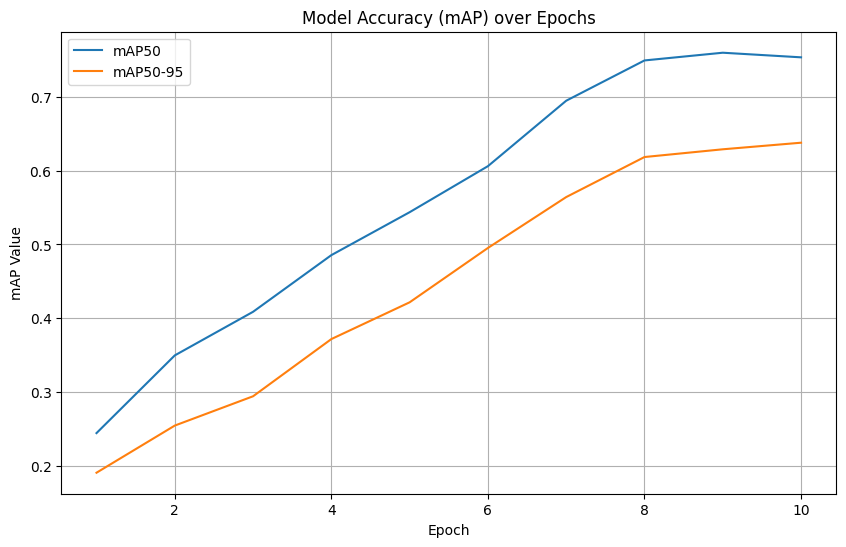

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Đường dẫn đến thư mục kết quả huấn luyện
# (Giả định 'results' là biến từ quá trình train hoặc bạn biết đường dẫn)
# Trong trường hợp này, dựa vào output training, thư mục là /content/runs_yolo12/exp_snake
results_dir = "/content/runs_yolo12/exp_snake"
results_csv_path = os.path.join(results_dir, "results.csv")

# Kiểm tra xem file results.csv có tồn tại không
if os.path.exists(results_csv_path):
    # Đọc file CSV vào DataFrame
    df = pd.read_csv(results_csv_path)

    # Lấy các cột cần thiết
    epochs = df['epoch']
    # accuracy metrics thường là metrics/mAP50(B) và metrics/mAP50-95(B)
    # Tên cột có thể khác tùy phiên bản Ultralytics, bạn có thể kiểm tra df.columns
    mAP50 = df['metrics/mAP50(B)']
    mAP50_95 = df['metrics/mAP50-95(B)']

    # Vẽ biểu đồ
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, mAP50, label='mAP50')
    plt.plot(epochs, mAP50_95, label='mAP50-95')

    plt.title('Model Accuracy (mAP) over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('mAP Value')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print(f"Lỗi: Không tìm thấy file results.csv tại: {results_csv_path}. Vui lòng đảm bảo quá trình training đã hoàn tất thành công và tạo ra file này.")



--- Đánh giá mô hình trên tập Test ---
Ultralytics 8.3.234 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12n summary (fused): 159 layers, 2,560,823 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 1.2±1.2 ms, read: 7.8±17.2 MB/s, size: 51.2 KB)
val: Scanning /content/drive/MyDrive/SnakeAid.v4-masking-5k-image-.yolov12/test/labels... 197 images, 3 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 197/197 2.7it/s 1:12
val: New cache created: /content/drive/MyDrive/SnakeAid.v4-masking-5k-image-.yolov12/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 13/13 3.2it/s 4.1s
                   all        197        212      0.751      0.594      0.708      0.592
           cap_nia_bac          9         13      0.849      0.538      0.615      0.554
           cap_nia_nam          7          7      0.622      0.857      0.905       0.82
              cap_nong         12         13     

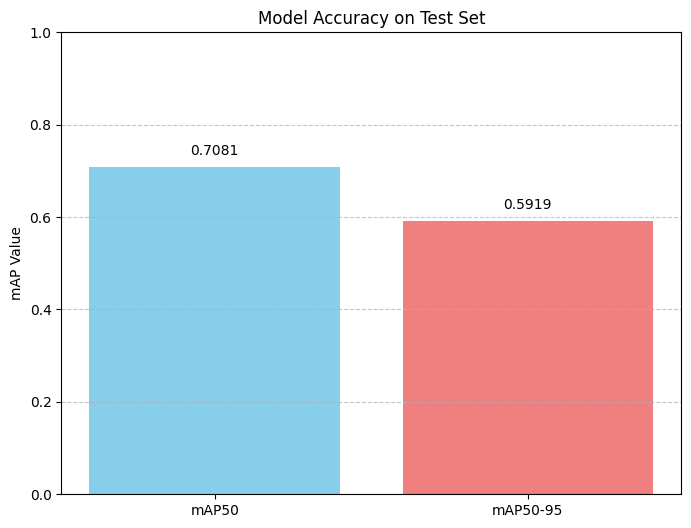

In [18]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import os

# Đường dẫn đến mô hình tốt nhất đã train
model_path = "/content/runs_yolo12/exp_snake/weights/best.pt"

# Đường dẫn đến file data.yaml của bạn
data_yaml_path = os.path.join(DATASET_ROOT, "data.yaml")

# Tải mô hình
model = YOLO(model_path)

print("\n--- Đánh giá mô hình trên tập Test ---")

# Chạy đánh giá trên tập test
metrics = model.val(data=data_yaml_path, split='test')

# Lấy các chỉ số mAP
mAP50_test = metrics.results_dict['metrics/mAP50(B)']
mAP50_95_test = metrics.results_dict['metrics/mAP50-95(B)']

print(f"\nmAP50 trên tập Test: {mAP50_test:.4f}")
print(f"mAP50-95 trên tập Test: {mAP50_95_test:.4f}")

# Vẽ biểu đồ trực quan
labels = ['mAP50', 'mAP50-95']
values = [mAP50_test, mAP50_95_test]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['skyblue', 'lightcoral'])
plt.ylim(0, 1) # mAP values range from 0 to 1
plt.title('Model Accuracy on Test Set')
plt.ylabel('mAP Value')

for i, v in enumerate(values):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
